In [1]:
using Plots
using LaTeXStrings
using LinearAlgebra
empty!(ARGS)
#push!(ARGS, "../test/test_data/data_s0/grid_b5_f5_s0.jld2")
#push!(ARGS, "../test/test_data/data_s0")
push!(ARGS, "/home/julisn/Hamburg/tmp_marvin_test/fcc/U1.0beta1.0n0.75mu-0.187/freqList.jld2")
push!(ARGS, "/home/julisn/Hamburg/tmp_marvin_test/fcc/U1.0beta1.0n0.75mu-0.187")
push!(ARGS, "true")

#scalefontsizes(1.8)
include(joinpath(@__DIR__,"../scripts/expand_vertex.jl"));

ωi0 = nBose+1;

  Activating project at `~/Codes/VertexPostprocessing.jl`


Expanding Vertex
Done expanding!
Calculating single particle Green's function
Calculating derived quantities. Rank 3 quantities have the index convention [ωm, νn, νpn]
Done with ph channel!
Done with pp channel!
Storing results in DMFT_out.jld2


### Asymptotic Behavior

## $\Gamma$ 

$\Gamma^{\nu\nu'\omega}_d \sim \phantom{-}U + \frac{U^2}{2} \chi^{\nu'-\nu}_d + \frac{3U^2}{2 }\chi^{\nu'-\nu}_m - U^2 \chi^{\nu+\nu'+\omega}_{pp,\uparrow\downarrow} $

$\Gamma^{\nu\nu'\omega}_m \sim -U + \frac{U^2}{2} \chi^{\nu'-\nu}_d - \frac{U^2}{2} \chi^{\nu'-\nu}_m - U^2 \chi^{\nu+\nu'+\omega}_{pp,\uparrow\downarrow} $

$\Gamma^{\nu\nu'\omega}_s \sim 2U - \frac{U^2}{2} \chi^{\nu'-\nu}_d + \frac{3U^2}{2} \chi^{\nu'-\nu}_m - \frac{U^2}{2} \chi^{\omega-\nu-\nu'}_d - \frac{3U^2}{2} \chi^{\omega-\nu-\nu'}_{m} $

$\Gamma^{\nu\nu'\omega}_t \sim \frac{U^2}{2} \chi^{\nu'-\nu}_d + \frac{U^2}{2} \chi^{\nu'-\nu}_m - \frac{U^2}{2} \chi^{\omega-\nu-\nu'}_d - \frac{U^2}{2} \chi^{\omega-\nu-\nu'}_{m} $

## $F$

$F^{\nu\nu'\omega}_d \sim \phantom{-}U + \frac{U^2}{2} \chi^{\nu'-\nu}_d + \frac{3U^2}{2 }\chi^{\nu'-\nu}_m - U^2 \chi^{\nu+\nu'+\omega}_{pp} + U \lambda^{\nu\omega}_d + U \lambda^{\nu'\omega}_d + U^2 \chi^{\omega}_d$

$F^{\nu\nu'\omega}_m \sim -U + \frac{U^2}{2} \chi^{\nu'-\nu}_d - \frac{U^2}{2} \chi^{\nu'-\nu}_m - U^2 \chi^{\nu+\nu'+\omega}_{pp}  + U \lambda^{\nu\omega}_m + U \lambda^{\nu'\omega}_m + U^2 \chi^{\omega}_m$

$F^{\nu\nu'\omega}_s \sim 2U - \frac{U^2}{2} \chi^{\nu'-\nu}_d + \frac{3U^2}{2} \chi^{\nu'-\nu}_m - \frac{U^2}{2} \chi^{\omega-\nu-\nu'}_d - \frac{3U^2}{2} \chi^{\omega-\nu-\nu'}_{m} + 2U \lambda^{\nu\omega}_{pp,\uparrow\downarrow} + 2U \lambda^{\nu'\omega}_{pp,\uparrow\downarrow} + 2 U^2 \chi^{\omega}_{pp,\uparrow\downarrow}$

$F^{\nu\nu'\omega}_t \sim  \frac{U^2}{2} \chi^{\nu'-\nu}_d + \frac{U^2}{2} \chi^{\nu'-\nu}_m - \frac{U^2}{2} \chi^{\omega-\nu-\nu'}_d - \frac{U^2}{2} \chi^{\omega-\nu-\nu'}_{m}$


In [2]:
Γd_lim_diag =  U + U^2/2 * χ_d_asympt[1]/β^2 + 1.5 * U^2 * χ_m_asympt[1]/β^2 
Γm_lim_diag = -U + U^2/2 * χ_d_asympt[1]/β^2 - 0.5 * U^2 * χ_m_asympt[1]/β^2 
Γs_lim_diag = 2U - U^2/2 * χ_d_asympt[1]/β^2 + 1.5 * U^2 * χ_m_asympt[1]/β^2
Γt_lim_diag =    + U^2/2 * χ_d_asympt[1]/β^2 + 0.5 * U^2 * χ_m_asympt[1]/β^2;

Γd_lim_bg =  U
Γm_lim_bg = -U
Γs_lim_bg = 2U
Γt_lim_bg = 0.0;

Fd_lim_diag =  U + U^2/2 * χ_d_asympt[1]/β^2 + 1.5 * U^2 * χ_m_asympt[1]/β^2 - 1 * U^2 * χ_d_asympt[1]/β^2
Fm_lim_diag = -U + U^2/2 * χ_d_asympt[1]/β^2 - 0.5 * U^2 * χ_m_asympt[1]/β^2 - 1 * U^2 * χ_m_asympt[1]/β^2
Fs_lim_diag = 2U - U^2/2 * χ_d_asympt[1]/β^2 + 1.5 * U^2 * χ_m_asympt[1]/β^2 - 2 * U^2 * χ_pp_asympt[1]/β^2
Ft_lim_diag =      U^2/2 * χ_d_asympt[1]/β^2 + 0.5 * U^2 * χ_m_asympt[1]/β^2 ;

Fd_lim_bg =  U - 1 * U^2 * χ_d_asympt[1]/β^2 
Fm_lim_bg = -U - 1 * U^2 * χ_m_asympt[1]/β^2 
Fs_lim_bg = 2U - 2 * U^2 * χ_pp_asympt[1]/β^2
Ft_lim_bg = 0.0;

#Γm_diags = dropdims(mapslices(x->diag(x), Γm, dims=(1,2)),dims=2);
#Γd_diags = dropdims(mapslices(x->diag(x), Γd, dims=(1,2)),dims=2);
#Γs_diags = dropdims(mapslices(x->diag(x), Γs, dims=(1,2)),dims=x2);

In [3]:
# - compensates global -1 factor in script

function format_out(val, lim; digits=5)
    lim_s = lpad(rpad(round(real(lim),digits=digits), 6, "0"),10, " ")
    val_s = lpad(rpad(round(real(val),digits=digits), 6, "0"),10, " ")
    sim = isapprox(val, lim, rtol=0.05) ? "\e[1m\e[38;2;0;150;50;249m✓\x1b[0m" :  "\e[1m\e[38;2;250;0;0;249m↯\x1b[0m"
    return "$val_s ≟ $lim_s  " * sim
end
bg_ind = floor(Int, size(Fd,2)*(1.4/4))
nan_ind = trunc(Int,nBose/2+1)
println("                   numerical ≟ exact")
println("   ================ Γ ==================   ")
println("Diagonal Γd   :   $(format_out(Γd[ωi0,bg_ind,bg_ind] .* β^2 , Γd_lim_diag))")
println("Diagonal Γm   :   $(format_out(Γm[ωi0,bg_ind,bg_ind] .* β^2 , Γm_lim_diag))")
println("Diagonal Γs   :   $(format_out(Γs[ωi0,bg_ind,bg_ind]  .* β^2 , Γs_lim_diag))")
println("Diagonal Γt   :   $(format_out(Γt[ωi0,bg_ind,bg_ind]  .* β^2 , Γt_lim_diag))")

println("Background Γd :   $(format_out(Γd[ωi0,bg_ind,end-bg_ind] .* β^2, Γd_lim_bg))")
println("Background Γm :   $(format_out(Γm[ωi0,bg_ind,end-bg_ind] .* β^2, Γm_lim_bg))")
println("Background Γs :   $(format_out(Γs[ωi0,bg_ind,end-bg_ind]  .* β^2, Γs_lim_bg))")
println("Background Γt :   $(format_out(Γt[ωi0,bg_ind,end-bg_ind]  .* β^2, Γt_lim_bg))")

println("   ================ F ==================   ")
println("Diagonal Fd   :   $(format_out(Fd[ωi0,bg_ind,bg_ind] .* β^2, Fd_lim_diag))")
println("Diagonal Fm   :   $(format_out(Fm[ωi0,bg_ind,bg_ind] .* β^2, Fm_lim_diag))")
println("Diagonal Fs   :   $(format_out(Fs[ωi0,bg_ind,bg_ind] .* β^2, Fs_lim_diag))")
println("Diagonal Ft   :   $(format_out(Ft[ωi0,bg_ind,bg_ind] .* β^2, Ft_lim_diag))")

println("Background Fd :   $(format_out(Fd[ωi0,bg_ind,end-bg_ind] .* β^2, Fd_lim_bg))")
println("Background Fm :   $(format_out(Fm[ωi0,bg_ind,end-bg_ind] .* β^2, Fm_lim_bg))")
println("Background Fs :   $(format_out(Fs[ωi0,bg_ind,end-bg_ind].* β^2, Fs_lim_bg))")
println("Background Ft :   $(format_out(Ft[ωi0,bg_ind,end-bg_ind].* β^2, Ft_lim_bg))")

                   numerical ≟ exact
   ================ Γ ==================   
Diagonal Γd   :    -99.81666 ≟    1.44615  ↯
Diagonal Γm   :     -1.05081 ≟   -1.14872  ↯
Diagonal Γs   :    6320.2469 ≟    2.44615  ↯
Diagonal Γt   :   -6319.1806 ≟    0.14872  ↯
Background Γd :     95.77446 ≟     1.0000  ↯
Background Γm :     -0.98791 ≟     -1.000  ✓
Background Γs :       0.8579 ≟     2.0000  ↯
Background Γt :      -0.0035 ≟     0.0000  ↯
   ================ F ==================   
Diagonal Fd   :   18966.71218 ≟    1.44615  ↯
Diagonal Fm   :     -1.32286 ≟   -1.44615  ↯
Diagonal Fs   :       1.9548 ≟    2.07834  ↯
Diagonal Ft   :      0.22281 ≟    0.14872  ↯
Background Fd :   -17742.35395 ≟     1.0000  ↯
Background Fm :     -1.25995 ≟   -1.29744  ✓
Background Fs :      1.64585 ≟    1.63219  ✓
Background Ft :     -0.00787 ≟     0.0000  ↯


In [20]:
Fd[ωi0,:,:]'[47,44:50] 

7-element Vector{ComplexF64}:
   144.6558513467529 + 27.738761356653587im
  103.47879070943563 + 20.882750824201807im
   62.37868759859569 + 14.030902745800422im
  22.216648476711434 + 7.102676246140106im
  -21.53795408911447 - 0.0im
  -62.00360343005671 - 6.616097289628113im
 -103.09916775180338 - 13.4613040837977im

In [5]:
Fd[1,1,1:12] 

12-element Vector{ComplexF64}:
 -0.7299279598443953 + 0.7001386261476616im
                 0.0 + 0.0im
                 0.0 + 0.0im
                 0.0 + 0.0im
                 0.0 + 0.0im
                 0.0 + 0.0im
                 0.0 + 0.0im
                 0.0 + 0.0im
                 0.0 + 0.0im
                 0.0 + 0.0im
                 0.0 + 0.0im
  1.9395530660844358 - 0.01262333370931761im

In [6]:
Γd[ωi0,47,44:50] 

7-element Vector{ComplexF64}:
 0.17938395574690627 + 0.1100323968197203im
 0.41304286882423286 + 0.0892494098377919im
  0.6484343621673729 + 0.07159279267444921im
  1.3762964443457193 + 0.15446424980618723im
  0.9261530636560975 + 1.0547118733938987e-15im
  1.3469811741667035 - 0.05919124234070117im
  1.5864733220764198 - 0.06408866278602735im

In [7]:
Γm[ωi0,47,44:50] 

7-element Vector{ComplexF64}:
  -1.000442018285992 - 0.0098347320750969im
 -0.9999516005150373 - 0.013041327854000329im
 -0.9986123478403327 - 0.019284554309170032im
 -1.0345052052926444 - 0.04130617217805632im
 -0.8113770383316181 + 1.3010426069826053e-18im
 -0.9906291995380055 + 0.037354958146230514im
 -0.9983465201431785 + 0.01967260306380625im

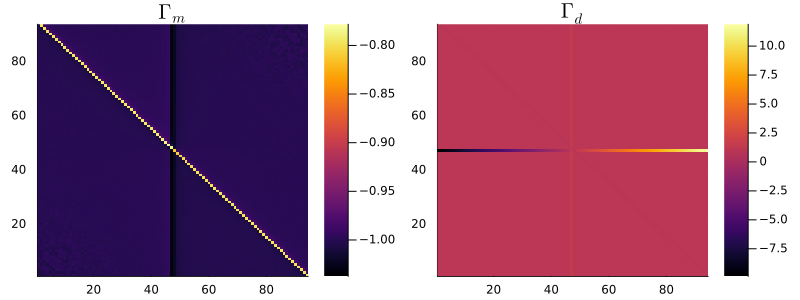

In [8]:
ts = deepcopy(Γm[:,:,ωi0])
#ts[14+nan_ind,15+nan_ind] = 900;
tt = deepcopy(Γd[:,:,ωi0])
#tt[14+nan_ind,15+nan_ind] = 900;
p1 = heatmap(real(ts), title=L"Γ_m")
p2 = heatmap(real(tt), title=L"Γ_d")
plot(p1, p2, size=(800,300))

##### Checking sign of χ^νν'ω_DMFT

χm_gen_rs = reshape(χph_upup .- χph_updo, 2*nFermi, 2*nFermi, 2*nBose+1);
χd_gen_rs = reshape(χph_upup .+ χph_updo, 2*nFermi, 2*nFermi, 2*nBose+1);

χm = dropdims(sum(χm_gen_rs, dims=(1,2)),dims=(1,2))/β^2;
χd = dropdims(sum(χd_gen_rs, dims=(1,2)),dims=(1,2))/β^2;
p1 = plot(-nBose:nBose, real(χm), markershape=:auto, label=L"\sum_{\nu\nu'} \chi^{\nu\nu'\omega}_m ")
plot!(0:nBose, real(χ_m_asympt[1:nBose+1])/β^2, label=L"\chi^{\omega}_m")
p2 = plot(-nBose:nBose, real(χd), markershape=:auto, label=L"\sum_{\nu\nu'} \chi^{\nu\nu'\omega}_d ")
plot!(0:nBose, real(χ_d_asympt[1:nBose+1])/β^2, label=L"\chi^{\omega}_d")
plot(p1,p2, size=(800,300))

In [9]:
χpp_updo = (0.5 .* (χpp_s + χpp_t))
nan_ind = isnan.(χpp_updo)
χpp_updo[nan_ind] .= 0.0;
for (ωi,ωn) in enumerate(-nBose:nBose)
    for (νi,νn) in  enumerate((-nFermi:nFermi-1) .- shift*trunc(Int, ωn/2)) 
        χpp_updo[νi,νi,ωi] -= χ0_pp_full[(ωn,νn)]
    end
end

χpp_updo_ω = sum(χpp_updo, dims=(1,2))[1,1,:]/β^2;
plot(-nBose:nBose, real(χpp_updo_ω), markershape=:auto)
plot!(0:9, real(χ_pp_asympt)[1:10] ./ β^2, markershape=:auto)

LoadError: ArgumentError: invalid index: (-46, -47) of type Tuple{Int64, Int64}

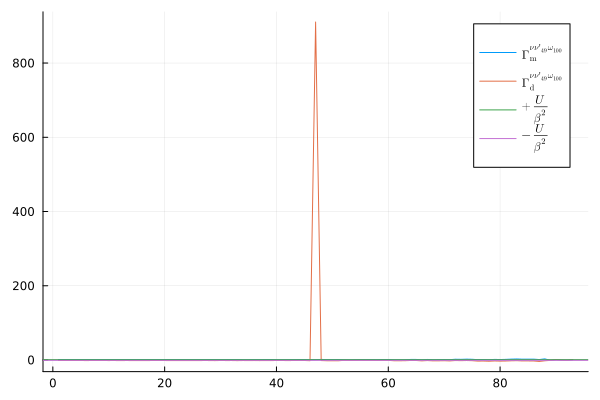

In [10]:
lim_b = U/β^2

plot(real(-Γm[:,end,end]),  label=L"\Gamma_\mathrm{m}^{\nu\nu'_{49}\omega_{100}}")
plot!(real(-Γd[:,end,end]), label=L"\Gamma_\mathrm{d}^{\nu\nu'_{49}\omega_{100}}")
hline!([ lim_b], label=L"+\frac{U}{\beta^2}")
hline!([-lim_b], label=L"-\frac{U}{\beta^2}")

# PP channel
## chi

In [11]:
p1 = heatmap(real(χpp_s[:,:,ωi0]), title=L"\Re \chi^{\nu\nu'\omega_0}_s")
p2 = heatmap(real(χpp_t[:,:,ωi0]), title=L"\Re \chi^{\nu\nu'\omega_0}_t")
p3 = heatmap(imag(χpp_s[:,:,ωi0]), title=L"\Im \chi^{\nu\nu'\omega_0}_s")
p4 = heatmap(imag(χpp_t[:,:,ωi0]), title=L"\Im \chi^{\nu\nu'\omega_0}_t")
plot(p1, p2, p3, p4, size=(1200,900))

LoadError: BoundsError: attempt to access 821748-element Vector{ComplexF64} at index [1:821748, 1:1, 47]

## Gamma

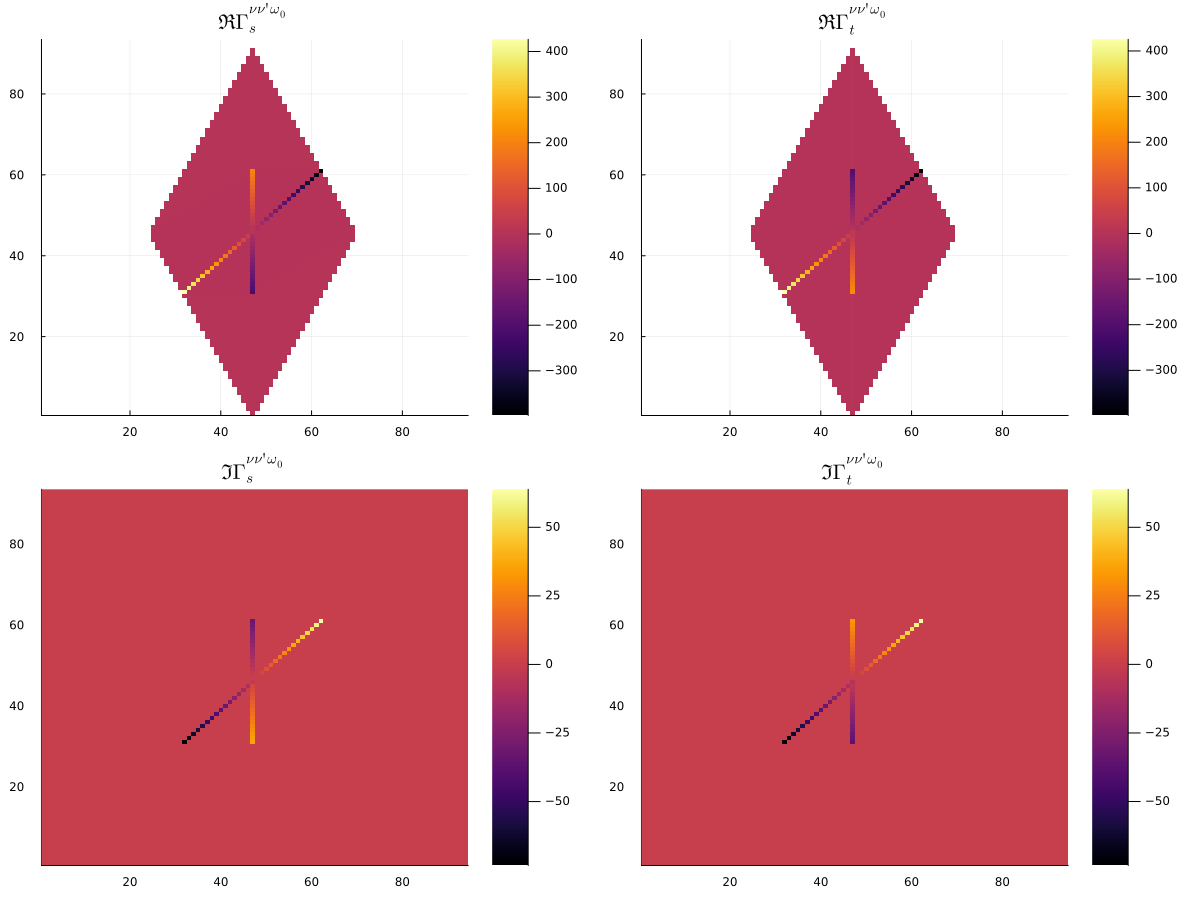

In [12]:
p1 = heatmap(real(Γs[:,:,ωi0]), title=L"\Re \Gamma^{\nu\nu'\omega_0}_s")
p2 = heatmap(real(Γt[:,:,ωi0]), title=L"\Re \Gamma^{\nu\nu'\omega_0}_t")
p3 = heatmap(imag(Γs[:,:,ωi0]), title=L"\Im \Gamma^{\nu\nu'\omega_0}_s")
p4 = heatmap(imag(Γt[:,:,ωi0]), title=L"\Im \Gamma^{\nu\nu'\omega_0}_t")
plot(p1, p2, p3, p4, size=(1200,900))

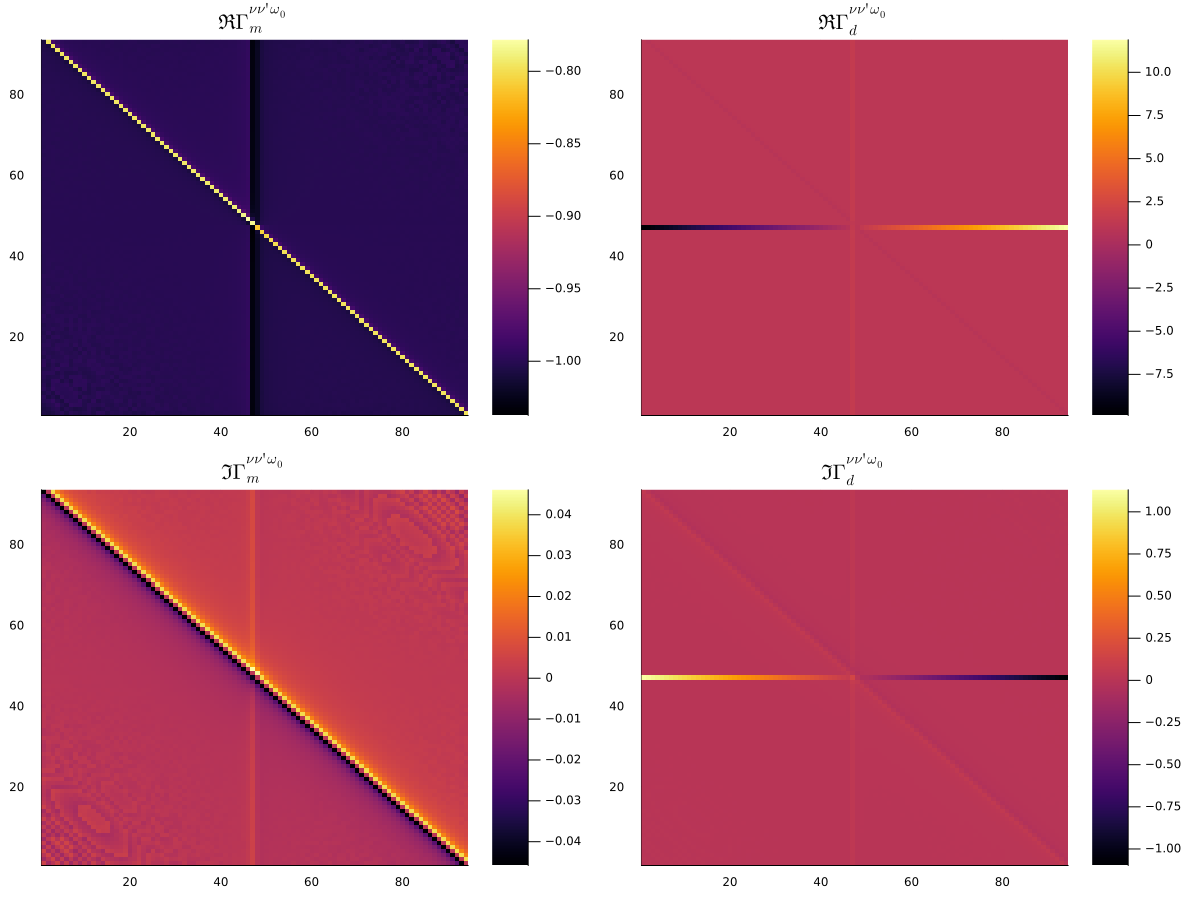

In [13]:
p1 = heatmap(real(Γm[:,:,ωi0]), title=L"\Re \Gamma^{\nu\nu'\omega_0}_m")
p2 = heatmap(real(Γd[:,:,ωi0]), title=L"\Re \Gamma^{\nu\nu'\omega_0}_d")
p3 = heatmap(imag(Γm[:,:,ωi0]), title=L"\Im \Gamma^{\nu\nu'\omega_0}_m")
p4 = heatmap(imag(Γd[:,:,ωi0]), title=L"\Im \Gamma^{\nu\nu'\omega_0}_d")
plot(p1, p2, p3, p4, size=(1200,900))

## Full Vertex

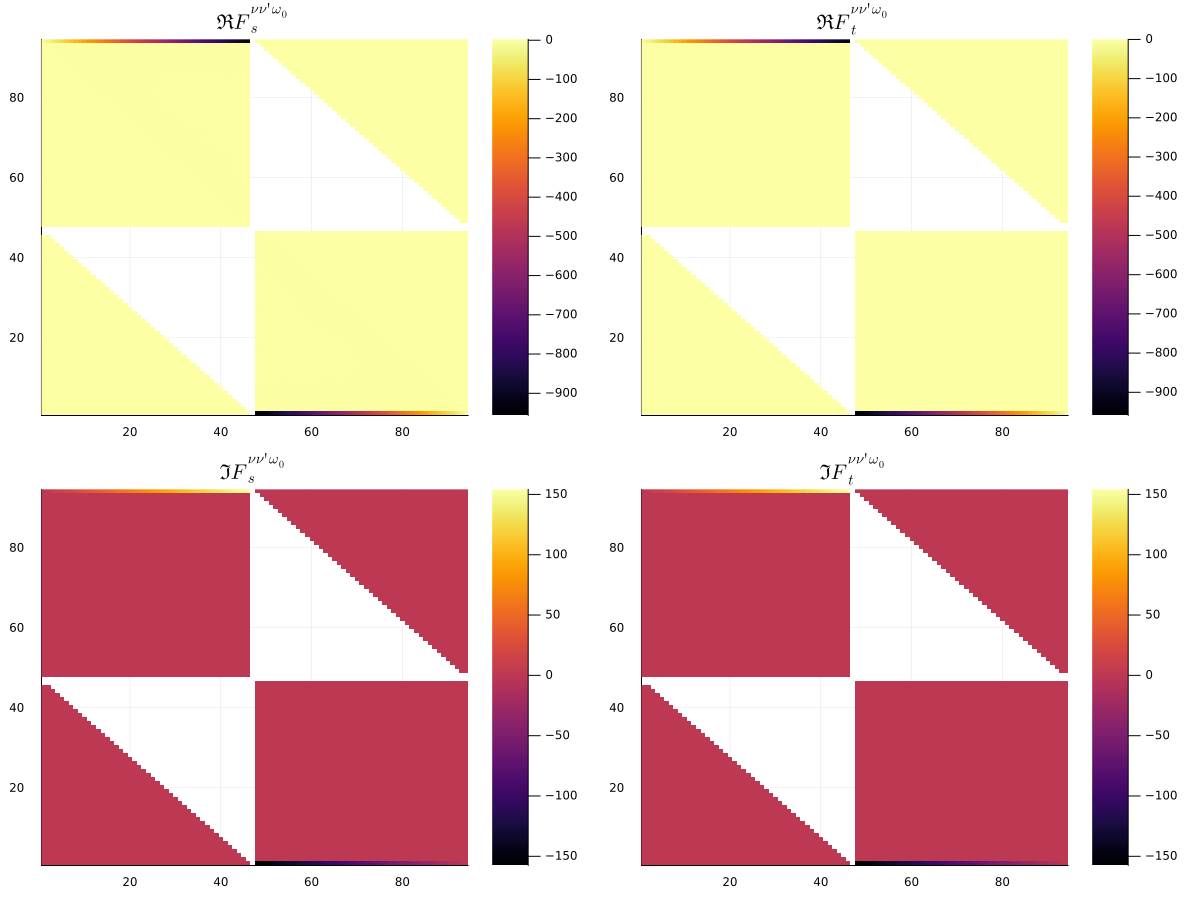

In [14]:
Fs_r = reshape(Fs, 2*nFermi, 2*nFermi, 2*nBose+1)
Ft_r = reshape(Ft, 2*nFermi, 2*nFermi, 2*nBose+1)

p1 = heatmap(real(Fs_r[:,:,ωi0]), title=L"\Re F^{\nu\nu'\omega_0}_s")
p2 = heatmap(real(Ft_r[:,:,ωi0]), title=L"\Re F^{\nu\nu'\omega_0}_t")
p3 = heatmap(imag(Fs_r[:,:,ωi0]), title=L"\Im F^{\nu\nu'\omega_0}_s")
p4 = heatmap(imag(Ft_r[:,:,ωi0]), title=L"\Im F^{\nu\nu'\omega_0}_t")
plot(p1, p2, p3, p4, size=(1200,900))

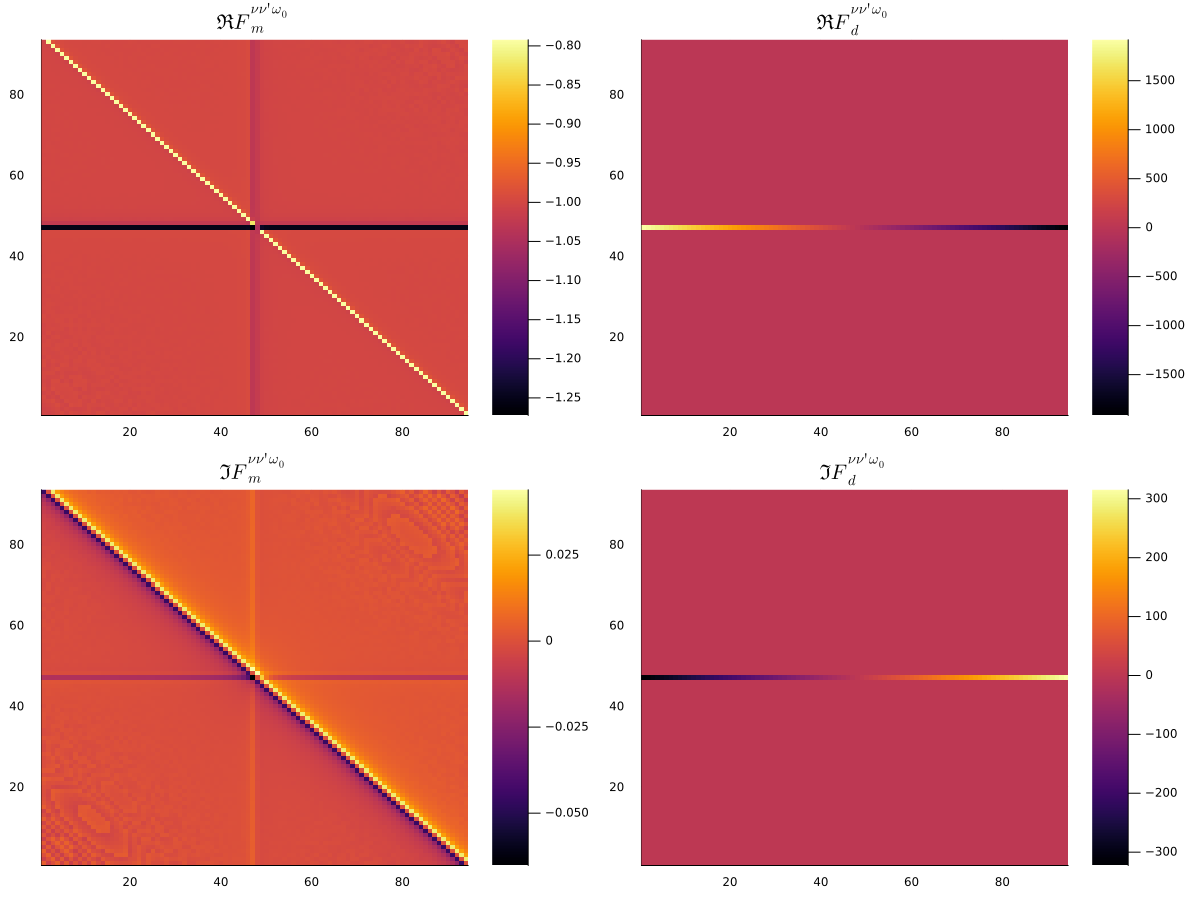

In [15]:
p1 = heatmap(real(Fm[:,:,ωi0]), title=L"\Re F^{\nu\nu'\omega_0}_m")
p2 = heatmap(real(Fd[:,:,ωi0]), title=L"\Re F^{\nu\nu'\omega_0}_d")
p3 = heatmap(imag(Fm[:,:,ωi0]), title=L"\Im F^{\nu\nu'\omega_0}_m")
p4 = heatmap(imag(Fd[:,:,ωi0]), title=L"\Im F^{\nu\nu'\omega_0}_d")
plot(p1, p2, p3, p4, size=(1200,900))

## Phi

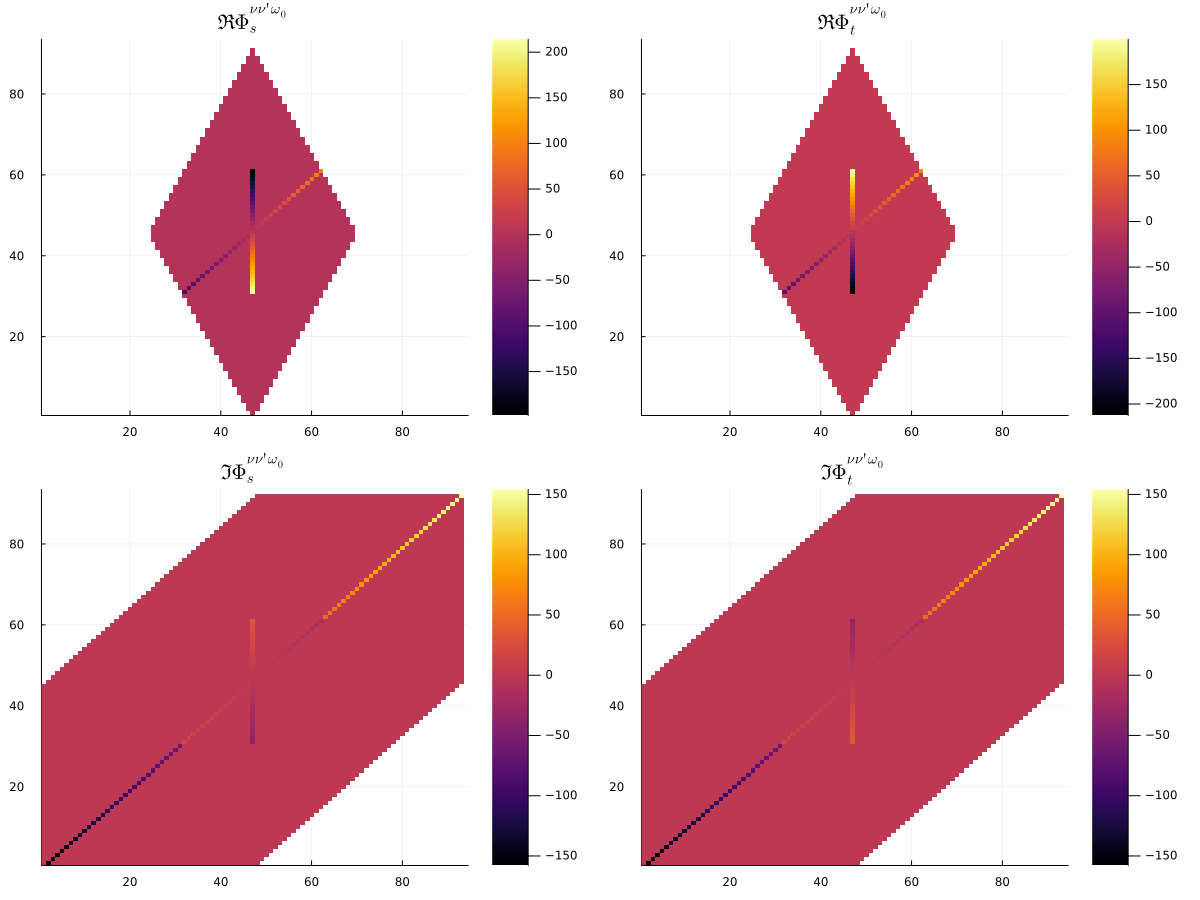

In [16]:
p1 = heatmap(real(Φs[:,:,ωi0]), title=L"\Re \Phi^{\nu\nu'\omega_0}_s")
p2 = heatmap(real(Φt[:,:,ωi0]), title=L"\Re \Phi^{\nu\nu'\omega_0}_t")
p3 = heatmap(imag(Φs[:,:,ωi0]), title=L"\Im \Phi^{\nu\nu'\omega_0}_s")
p4 = heatmap(imag(Φt[:,:,ωi0]), title=L"\Im \Phi^{\nu\nu'\omega_0}_t")
plot(p1, p2, p3, p4, size=(1200,900))

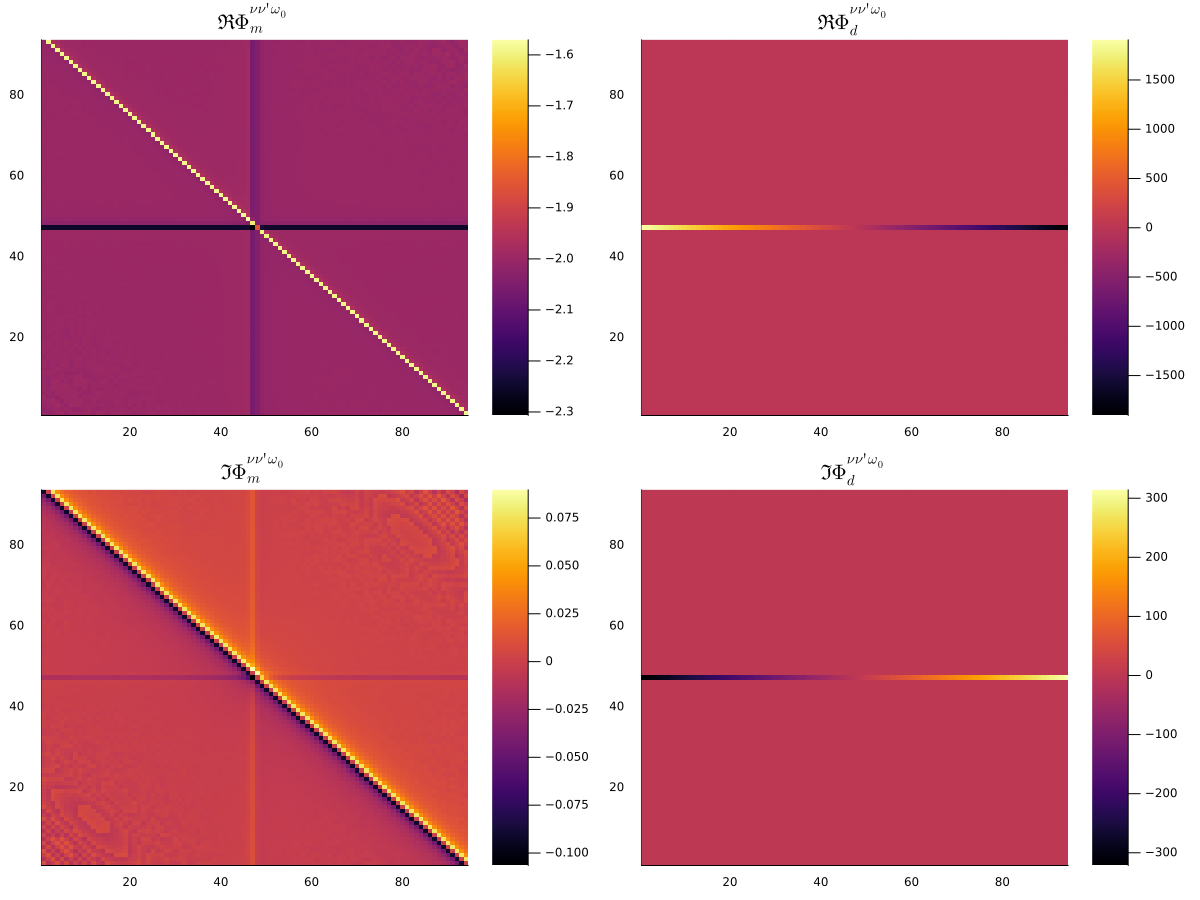

In [17]:
p1 = heatmap(real((Fm .+ Γm)[:,:,ωi0]), title=L"\Re \Phi^{\nu\nu'\omega_0}_m")
p2 = heatmap(real((Fd .+ Γd)[:,:,ωi0]), title=L"\Re \Phi^{\nu\nu'\omega_0}_d")
p3 = heatmap(imag((Fm .+ Γm)[:,:,ωi0]), title=L"\Im \Phi^{\nu\nu'\omega_0}_m")
p4 = heatmap(imag((Fd .+ Γd)[:,:,ωi0]), title=L"\Im \Phi^{\nu\nu'\omega_0}_d")
plot(p1, p2, p3, p4, size=(1200,900))

# Write

In [18]:
using JLD2

write_flag = false
write_loc = "./phi_pp.jld2"

if write_flag
jldopen(write_loc, "w") do f
    f["ϕs"] = Φs
    f["ϕt"] = Φt
end
end